REGRESION MULTIPLE
+ Ejemplo de Pipeline de preprocesado y regresion

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [44]:
df = pd.read_csv('../../CURSO_ANALISIS_BD2/data/varios/duke-forest-nulls.csv')
df.head(1)

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040.0,Single Family,1972.0,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...


In [45]:
df.isnull().sum()

address        0
price          0
bed            0
bath           0
area           2
type           2
year_built     4
heating        1
cooling        1
parking        0
lot            1
hoa           97
url            0
dtype: int64

In [46]:

df = df.drop(['hoa'], axis=1)

In [47]:
df.isnull().sum()

address       0
price         0
bed           0
bath          0
area          2
type          2
year_built    4
heating       1
cooling       1
parking       0
lot           1
url           0
dtype: int64

In [48]:
from sklearn.impute import SimpleImputer

# Estrategias para numéricos: mean, median
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
df['lot'] = imp_mean.fit_transform(df[['lot']]) # fit_transform recibe una matriz 2D, un dataframe

In [49]:
df.isnull().sum()

address       0
price         0
bed           0
bath          0
area          2
type          2
year_built    4
heating       1
cooling       1
parking       0
lot           0
url           0
dtype: int64

In [50]:
# categóricos: most_frequent, constant
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # moda
df['type'] = imp_most_freq.fit_transform(df[['type']])

In [51]:
df.isnull().sum()

address       0
price         0
bed           0
bath          0
area          2
type          0
year_built    4
heating       1
cooling       1
parking       0
lot           0
url           0
dtype: int64

In [52]:
df.head(5)

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040.0,Single Family,1972.0,"Other, Gas",central,0 spaces,0.97,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.0,4475.0,Single Family,1969.0,"Forced air, Gas",central,"Carport, Covered",1.38,https://www.zillow.com/homedetails/1616-Pinecr...
2,"2418 Wrightwood Ave, Durham, NC 27705",420000,2,3.0,1745.0,Single Family,1959.0,"Forced air, Gas",central,"Garage - Attached, Covered",0.51,https://www.zillow.com/homedetails/2418-Wright...
3,"2527 Sevier St, Durham, NC 27705",680000,4,3.0,2091.0,Single Family,1961.0,"Heat pump, Other, Electric, Gas",central,"Carport, Covered",0.84,https://www.zillow.com/homedetails/2527-Sevier...
4,"2218 Myers St, Durham, NC 27707",428500,4,3.0,1772.0,Single Family,2020.0,"Forced air, Gas",central,0 spaces,0.16,https://www.zillow.com/homedetails/2218-Myers-...


In [53]:
df = df.drop(['address', 'url', 'type', 'parking'], axis=1)
df.head(2)

,price,bed,bath,area,year_built,heating,cooling,lot
0,1520000,3,4.0,6040.0,1972.0,"Other, Gas",central,0.97
1,1030000,5,4.0,4475.0,1969.0,"Forced air, Gas",central,1.38


In [54]:
numeric_cols  = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print(numeric_cols)
print(categorical_cols)

# IterativeImputer a numéricas
df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])

# SimpleImputer most_frequent a categóricas
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

Index(['price', 'bed', 'bath', 'area', 'year_built', 'lot'], dtype='object')
Index(['heating', 'cooling'], dtype='object')


price         0
bed           0
bath          0
area          0
year_built    0
heating       0
cooling       0
lot           0
dtype: int64

In [55]:
df.isnull().sum()

price         0
bed           0
bath          0
area          0
year_built    0
heating       0
cooling       0
lot           0
dtype: int64

# EDA
+ pairplot
+ scatterplot
+ heatmap

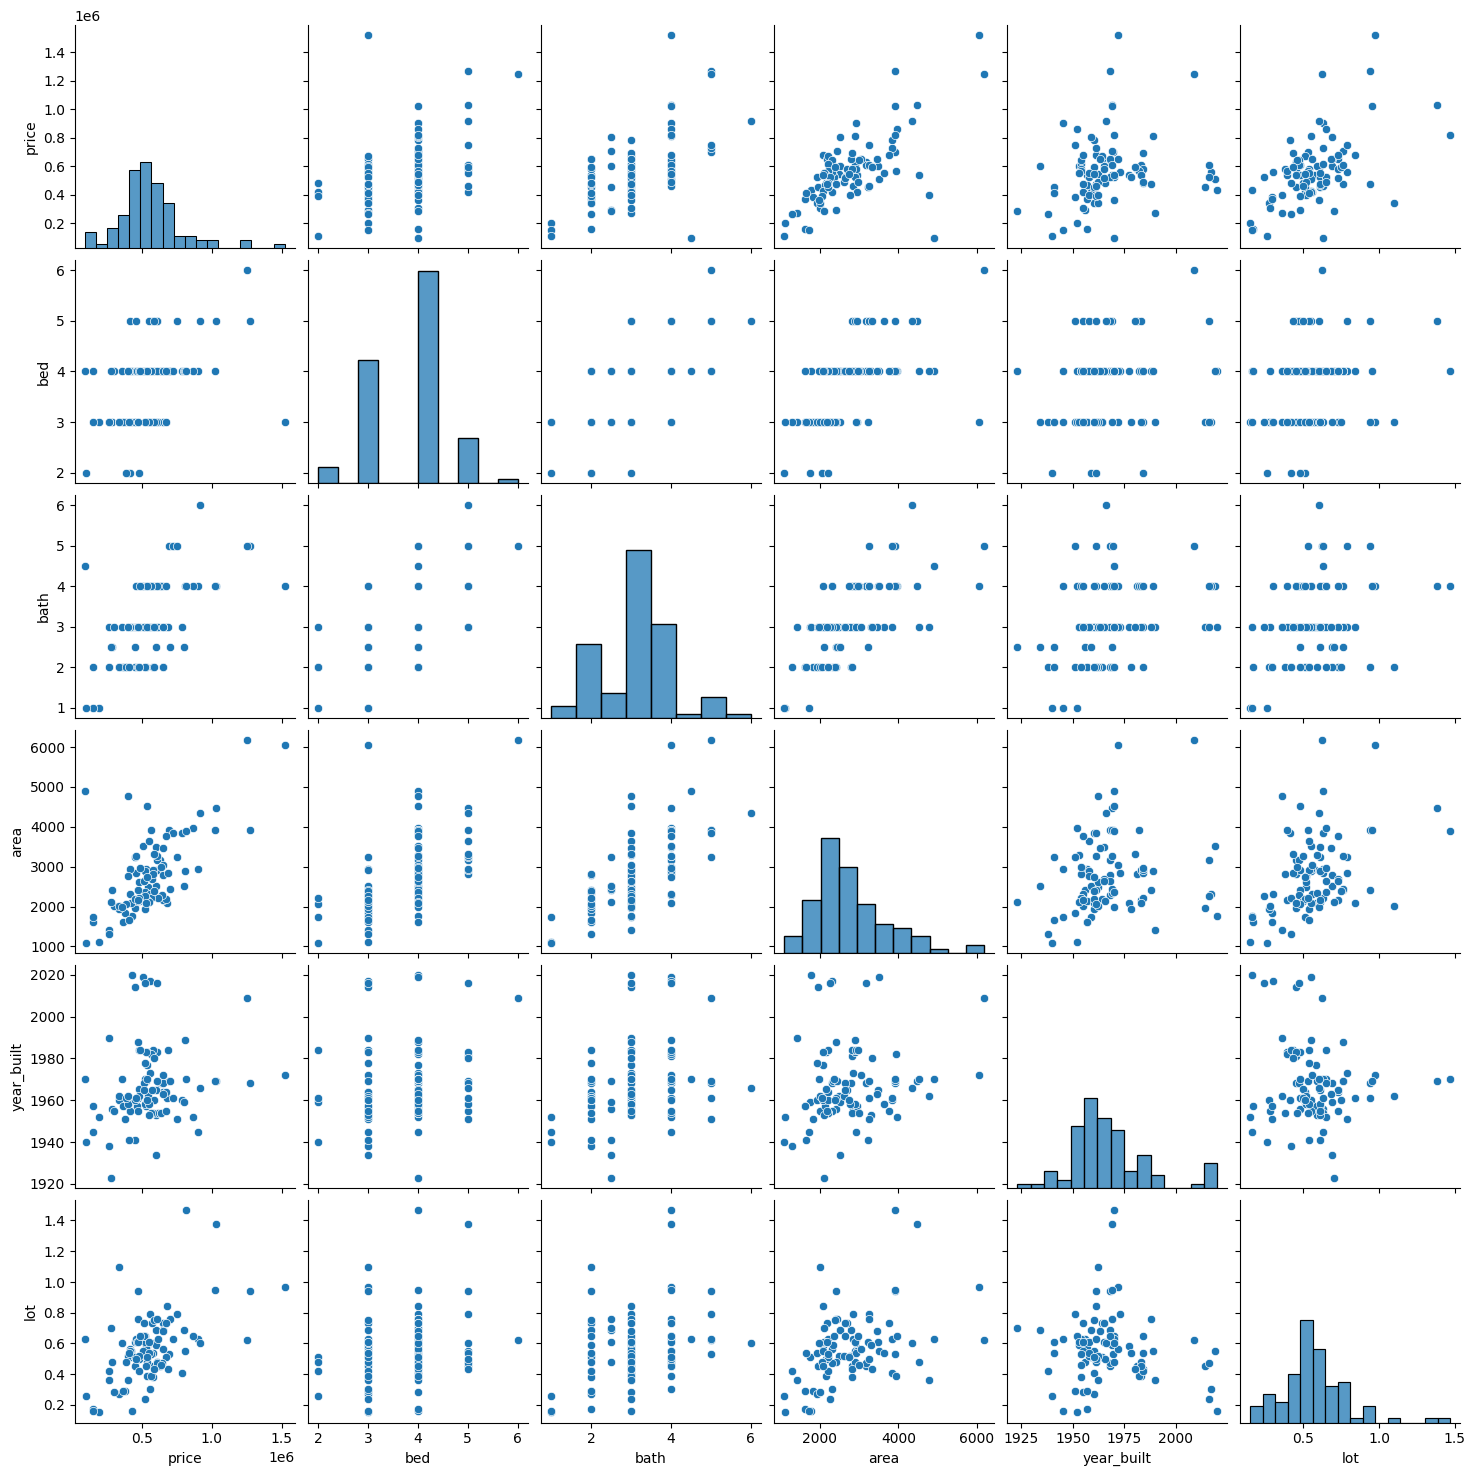

In [56]:
sns.pairplot(df)

In [57]:
from sklearn.linear_model import LinearRegression

X = df[['price']]
y = df['area']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

<Axes: xlabel='price', ylabel='area'>

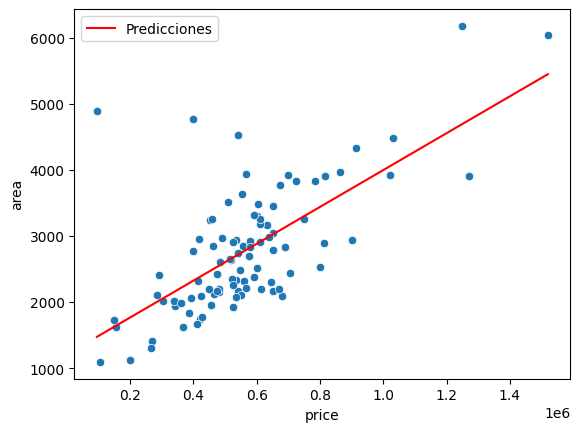

In [58]:
sns.scatterplot(data=df, x='price', y=df['area'])
sns.lineplot(x=df['price'], y=y_pred, color='r', label='Predicciones')

<Axes: xlabel='area', ylabel='price'>

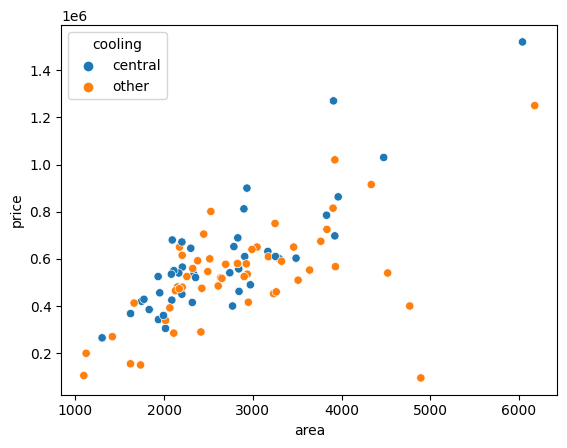

In [62]:
sns.scatterplot(data=df, x='area', y=df['price'], hue='cooling')

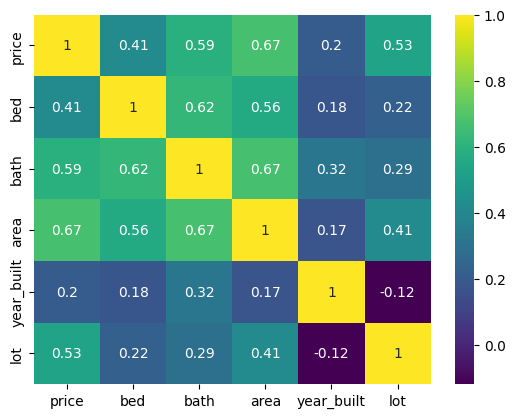

In [59]:
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

In [63]:
# CODIFICACION CATEGORICO A NUMERICO

# EQUIVALENTE A GET_DUMMIES DE PANDAS
from sklearn.preprocessing import OneHotEncoder

df['heating'].value_counts()



Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

In [64]:
df['heating'].str.split(',')

0                            [Other,  Gas]
1                       [Forced air,  Gas]
2                       [Forced air,  Gas]
3     [Heat pump,  Other,  Electric,  Gas]
4                       [Forced air,  Gas]
                      ...                 
93          [Forced air,  Heat pump,  Gas]
94           [Forced air,  Electric,  Gas]
95           [Forced air,  Electric,  Gas]
96                      [Forced air,  Gas]
97           [Forced air,  Electric,  Gas]
Name: heating, Length: 98, dtype: object

# PREPARAR DATA FRAME DE RESULTADOS